In [4]:
import rdkit
import rdkit.Chem as Chem
import rdkit.Chem.rdMolDescriptors

from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcCrippenDescriptors, CalcNumLipinskiHBA, CalcNumLipinskiHBD, CalcFractionCSP3, CalcNumRotatableBonds, CalcNumRings, CalcTPSA, CalcNumAromaticRings


import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


import numpy as np

import sklearn
import sklearn.model_selection


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error


In [5]:
data  = pd.read_csv("jak2_data.csv")
data

,SMILES,pIC50
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59
...,...,...
1906,CC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.72
1907,CN1CCN(c2ncc(-c3cnc4[nH]ccc4n3)c(NC3CCCN(S(=O)...,10.76
1908,CC1CN(S(=O)(=O)CC2CCC(N(C)c3[nH]cnc4nccc3-4)CC...,10.78
1909,CS(=O)(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97


In [6]:
# Molecular descriptors

# 1. Molecular Weight
# 2. Number of hydrogen bond acceptors. 
# 3. Number of hydrogen bond donors. 
# 4. logP
# 5. fraction of SP3 hybridized carbon (sp3 혼성을 가지는 탄소의 개수)
# 6. Number of rotatable bond. 
# 7. Number of rings. 
# 8. TPSA: polar surface area. (분자의 표면적 넓이, 단위: A^2)
# 9. Number of Aramatic Rings (방향성 고리의 개수)



In [7]:
# temp  = [ "A", "B","C","D","E"]
# for i, item in enumerate(temp):
#     print(i, item)

# i를 바로 나타낼수있음

In [8]:
properties = {"MW":[], "LogP":[], "HBA":[], "HBD": [], 
              "CSP3": [], "NumRotBond": [], "NumRings": [], "TPSA": [], 
              "NumAromaticRings": [], "pIC50": []}

for idx, smiles in enumerate(data["SMILES"]): # Smiles 열에서 반복.
    mol = Chem.MolFromSmiles(smiles)
    if mol == None: 
        continue
        
    properties["MW"].append(CalcExactMolWt(mol))
    properties["LogP"].append(CalcCrippenDescriptors(mol)[0])
    properties["HBA"].append(CalcNumLipinskiHBA(mol))
    properties["HBD"].append(CalcNumLipinskiHBD(mol))
    properties["CSP3"].append(CalcFractionCSP3(mol))
    properties["NumRotBond"].append(CalcNumRotatableBonds(mol))
    properties["NumRings"].append(CalcNumRings(mol))
    properties["TPSA"].append(CalcTPSA(mol))
    properties["NumAromaticRings"].append(CalcNumAromaticRings(mol))
    properties["pIC50"].append(data["pIC50"].iloc[idx]) #idx번째의 것을 가지고온다

In [9]:
new_data = pd.DataFrame(properties)

In [10]:
X = new_data.iloc[:, :-1] # 전체행, 마지막열 직전까지.
y = new_data.iloc[:, -1] # 전체행, 마지막열의 데이터를 추출.

In [11]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
my_model = RandomForestRegressor()

In [13]:
my_model.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
y_pred= my_model.predict(X_test)

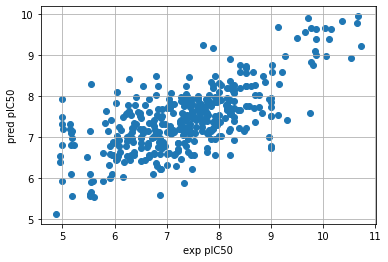

In [15]:
plt.scatter(y_test,y_pred)
plt.xlabel("exp pIC50")
plt.ylabel("pred pIC50")
plt.grid()

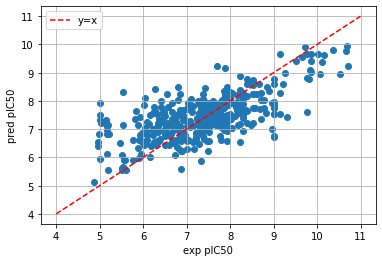

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel("exp pIC50")
plt.ylabel("pred pIC50")
plt.grid()
plt.plot(range(4,12),range(4,12),"r--",label = "y=x") #기준선
plt.legend() # 범례

In [17]:
# regresion에서 가장많이 사용하는 측정치는 mean squared error이다.
# 평균제곱 오차

In [18]:
#오차계산
mse1 = mean_squared_error(y_test, y_pred)
mse1

0.7092950214481752

In [19]:
import math
math.sqrt(mse1)

0.8421965456163871

In [20]:
#모델개선

In [21]:
my_model_v2 = RandomForestRegressor(n_estimators=200)

In [22]:
my_model_v2.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [23]:
y_pred_2 = my_model_v2.predict(X_test)

In [24]:
mse2 = mean_squared_error(y_test, y_pred_2)

In [25]:
mse2

0.6987032790598708

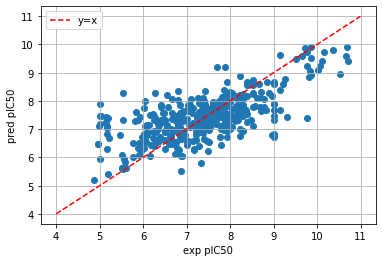

In [26]:
plt.scatter(y_test,y_pred_2)
plt.xlabel("exp pIC50")
plt.ylabel("pred pIC50")
plt.grid()
plt.plot(range(4,12),range(4,12),"r--",label = "y=x") #기준선
plt.legend() # 범례

In [24]:
my_model_v3 = RandomForestRegressor(n_estimators=300)
my_model_v3.fit(X_train,y_train)
y_pred_3 = my_model_v3.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred_3)

In [25]:
mse3

0.6930182798696857

In [26]:
# Feature importance 확인

In [27]:
my_model_v3.feature_importances_

array([0.16380123, 0.18376347, 0.09083988, 0.04942448, 0.17374453,
       0.06439217, 0.02661808, 0.19175773, 0.05565843])

In [28]:
new_data
# 위에서 보면 0.19가 제일 크다. (TPSA)
# 두번째로는 logP
# 세번째로는 ~~~

,MW,LogP,HBA,HBD,CSP3,NumRotBond,NumRings,TPSA,NumAromaticRings,pIC50
0,367.044919,4.1591,5,1,0.000000,4,4,71.95,4,4.26
1,506.126768,3.6743,10,4,0.083333,7,5,149.78,5,4.34
2,317.173942,1.5361,6,4,0.529412,5,3,101.37,2,4.53
3,301.190260,0.9510,6,5,0.500000,5,3,98.96,2,4.56
4,294.093917,3.2130,4,2,0.062500,2,3,49.84,3,4.59
...,...,...,...,...,...,...,...,...,...,...
1906,350.185509,2.8328,7,2,0.368421,3,4,86.80,3,10.72
1907,541.294742,2.8090,11,2,0.615385,7,5,123.24,3,10.76
1908,421.214761,1.7945,8,2,0.700000,6,4,102.42,0,10.78
1909,358.121195,1.4657,8,2,0.312500,4,4,103.87,3,10.97
